# Proyek Akhir : Membuat Model Sistem Rekomendasi : [Anime Dataset]
- **Nama:** [Aditiya Saputra]
- **Email:** [AditiyaS1811@gmail.com]
- **ID Dicoding:** [Aditiya18]

## Deskripsi Proyek
Proyek ini bertujuan untuk membangun sistem rekomendasi anime berbasis machine learning yang dapat memprediksi anime-anime mana yang kemungkinan besar akan disukai oleh pengguna tertentu, berdasarkan interaksi dan penilaian pengguna lain. Sistem ini menggunakan pendekatan pembelajaran representasi (embedding) untuk menangkap hubungan antara pengguna dan anime yang telah mereka beri nilai sebelumnya.

Langkah-langkah dalam proyek ini:

1. Persiapan Data:

    * Dataset yang digunakan berisi informasi tentang penilaian atau review pengguna terhadap berbagai judul anime.

    * Data diproses untuk mengekstraksi fitur penting seperti User ID, Anime Title, dan Overall Rating.

    * Dilakukan encoding terhadap kolom kategorikal seperti Username dan Anime Title menggunakan LabelEncoder agar dapat diproses oleh model.

    * Dataset dibagi menjadi data pelatihan dan validasi dengan rasio 80:20.

2. Pemodelan:

    * Model yang digunakan adalah Neural Collaborative Filtering yang dibangun dengan memanfaatkan embedding layer untuk mewakili pengguna dan anime dalam ruang vektor berdimensi rendah.

    * Model dirancang untuk mempelajari interaksi antara pengguna dan anime melalui dot product embedding yang disertai bias.

    * Proses pelatihan menggunakan Mean Squared Error (MSE) sebagai fungsi loss dan Adam Optimizer dengan EarlyStopping untuk menghindari overfitting.

3. Prediksi dan Rekomendasi:

    * Setelah model terlatih, sistem memprediksi skor minat untuk setiap kombinasi pengguna-anime.

    * Top 10 anime dengan skor prediksi tertinggi ditampilkan sebagai rekomendasi personal untuk pengguna tertentu.

    * Hasil ditampilkan dalam bentuk tabel dan grafik bar untuk memudahkan interpretasi visual.

4. Evaluasi Model:

    * Model dievaluasi menggunakan metrik MAE (Mean Absolute Error) dan RMSE (Root Mean Squared Error) pada data validasi untuk mengetahui akurasi prediksi yang dihasilkan.

    * Evaluasi visual juga dilakukan dengan membandingkan prediksi rating dengan rating aktual pada subset data.

Tujuan Proyek:

    * Mengembangkan sistem rekomendasi anime yang bersifat personal dan dapat meningkatkan pengalaman pengguna dalam menemukan konten yang relevan.

    * Menggunakan pendekatan machine learning yang efektif dalam mengenali pola preferensi pengguna terhadap judul anime tertentu.

    * Meningkatkan pemahaman tentang penerapan teknik embedding dan neural network dalam sistem rekomendasi konten.

Proyek ini tidak hanya menunjukkan kemampuan model dalam memberikan rekomendasi berbasis data historis, tetapi juga menekankan pentingnya teknik representasi pengguna dan item dalam menciptakan sistem yang adaptif dan personal.

Source Dataset : https://www.kaggle.com/datasets/stoicstatic/mal-top-10k-anime-details

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import zipfile
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Preparation

### Data Loading

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stoicstatic/mal-top-10k-anime-details

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/stoicstatic/mal-top-10k-anime-details
License(s): CC0-1.0
mal-top-10k-anime-details.zip: Skipping, found more recently modified local copy (use --force to force download)


Extract Dataset

In [ ]:
import zipfile

with zipfile.ZipFile('/content/mal-top-10k-anime-details.zip', 'r') as zip_ref:
    zip_ref.extractall('mal-top-10k-anime-details')

Read Dataset

In [ ]:
df = pd.read_csv('/content/mal-top-10k-anime-details/MAL Anime Reviews 85k.csv')
df.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and..."
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,Since I couldn't find any legitimate objective...


# EDA(Exploratory Data Analysis)

In [ ]:
df.info() # mengetahu informasi dari kolom
print(f"Dataset terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85953 entries, 0 to 85952
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Anime Rank        85953 non-null  int64 
 1   Anime Title       85953 non-null  object
 2   Anime URL         85953 non-null  object
 3   Username          85953 non-null  object
 4   Review Date       85953 non-null  object
 5   Episodes Watched  85953 non-null  object
 6   Review Likes      85953 non-null  int64 
 7   Overall Rating    85953 non-null  int64 
 8   Story Rating      85953 non-null  int64 
 9   Animation Rating  85953 non-null  int64 
 10  Sound Rating      85953 non-null  int64 
 11  Character Rating  85953 non-null  int64 
 12  Enjoyment Rating  85953 non-null  int64 
 13  Review            85953 non-null  object
dtypes: int64(8), object(6)
memory usage: 9.2+ MB
Dataset terdiri dari 85953 baris dan 14 kolom


1. Menunjukkan jumlah baris (entri) dalam dataset, dengan indeks yang dimulai dari
0 hingga 85952.

2. Data columns (total 14 columns):
Menunjukkan bahwa dataset memiliki 14 kolom.

3. List of columns:
  * Kolom-kolom yang ada pada dataset adalah sebagai berikut:

  * Anime Rank: Peringkat anime berdasarkan pengguna.

  * Anime Title: Judul anime.

  * Anime URL: URL yang mengarah ke halaman anime.

  * Username: Nama pengguna yang memberikan ulasan.

  * Review Date: Tanggal ulasan ditulis.

  * Episodes Watched: Jumlah episode yang sudah ditonton oleh pengguna.

  * Review Likes: Jumlah suka (like) yang diterima ulasan.

  * Overall Rating: Rating keseluruhan yang diberikan untuk anime.

  * Story Rating: Rating untuk cerita anime.

  * Animation Rating: Rating untuk animasi anime.

  * Sound Rating: Rating untuk kualitas suara.

  * Character Rating: Rating untuk karakter anime.

  * Enjoyment Rating: Rating untuk kesenangan yang dirasakan selama menonton anime.

  * Review: Isi ulasan yang ditulis oleh pengguna.

In [ ]:
df.isnull().sum() # Memriksa Koolom yang berisi null

,0
Anime Rank,0
Anime Title,0
Anime URL,0
Username,0
Review Date,0
Episodes Watched,0
Review Likes,0
Overall Rating,0
Story Rating,0
Animation Rating,0


Menghitung jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset.

In [ ]:
print(f"Jumlah user unik: {df['Username'].nunique():,}")
print(f"Jumlah anime unik: {df['Anime Title'].nunique():,}")

Jumlah user unik: 35,118
Jumlah anime unik: 4,315


Menampilkan jumlah user dan anime yang unik dalam dataset, masing-masing berdasarkan kolom 'Username' dan 'Anime Title'.

## Top 10 Anime yang di Nilai Atau Di Review

Tujuan dari analisis ini adalah untuk mengetahui anime yang mendapat perhatian atau popularitas tertinggi berdasarkan seberapa sering anime tersebut dinilai atau direview. Hal ini membantu untuk mengidentifikasi anime yang sedang tren atau menarik bagi banyak orang, serta memberikan wawasan mengenai preferensi atau minat pengguna dalam kategori anime tertentu.

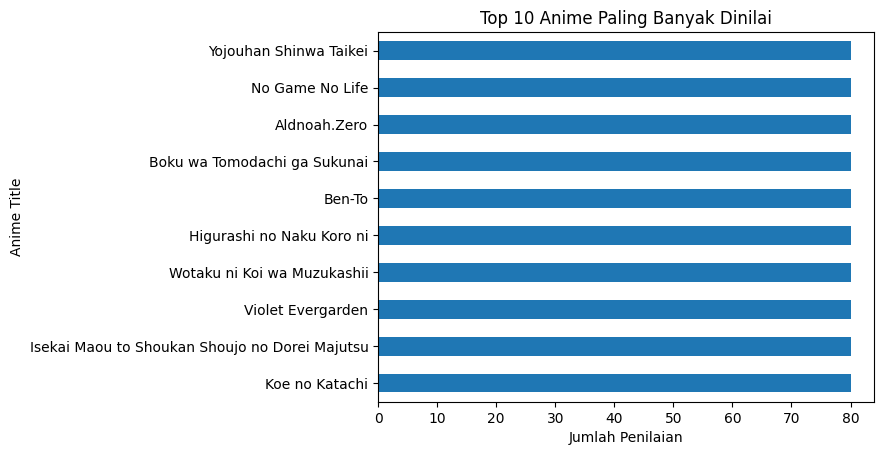

In [ ]:
top_anime = df['Anime Title'].value_counts().head(10)
top_anime.plot(kind='barh', title='Top 10 Anime Paling Banyak Dinilai')
plt.xlabel('Jumlah Penilaian')
plt.show()

Pada visualisasi diatas  sekitar 10 anime teratas mendapat penilaian sebanyak 80 review atau penilaian

## Distribusi Overall Rating

Untuk memvisualisasikan sebaran atau distribusi rating keseluruhan yang diberikan oleh pengguna pada anime dalam dataset. Dengan mengetahui distribusi rating, kita bisa memahami bagaimana pengguna memberikan penilaian terhadap anime secara umum, apakah kebanyakan rating cenderung tinggi, rendah, atau tersebar merata di berbagai kategori rating. Ini membantu untuk mengidentifikasi tren umum dalam penilaian pengguna terhadap anime dan juga dapat menunjukkan bias atau ketidakseimbangan dalam pemberian rating.

<ipython-input-9-abb4900a21e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Rating', data=df, palette="Set2")


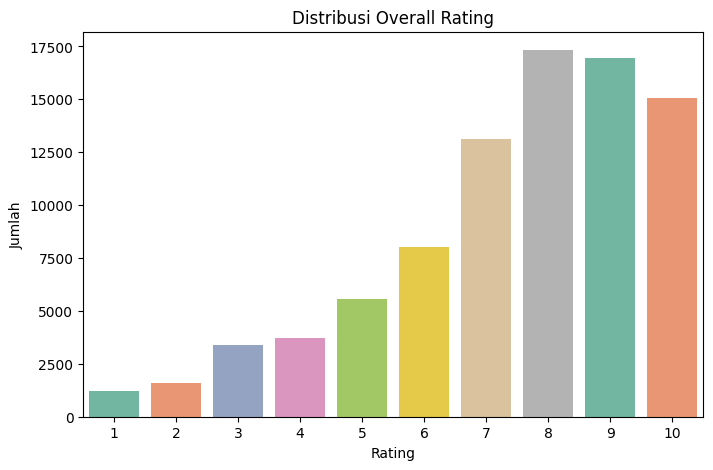

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Overall Rating', data=df, palette="Set2")
plt.title("Distribusi Overall Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()


Berdasarkan diagram diatas, nilai rating yang paling umum diberikan oleh user yaitu 8, dan yang paling rendah 1

## Korelasi Antar Rating

Untuk menganalisis hubungan antara berbagai kategori rating yang diberikan oleh pengguna, seperti Story Rating, Animation Rating, Sound Rating, Character Rating, dan Enjoyment Rating. Dengan mengetahui korelasi antar rating, kita dapat memahami apakah pengguna yang memberikan rating tinggi pada satu aspek anime (misalnya cerita) juga cenderung memberikan rating tinggi pada aspek lainnya (seperti animasi atau karakter). Hal ini membantu untuk mengidentifikasi pola atau hubungan yang mungkin ada antara kualitas berbagai elemen anime dalam persepsi pengguna.

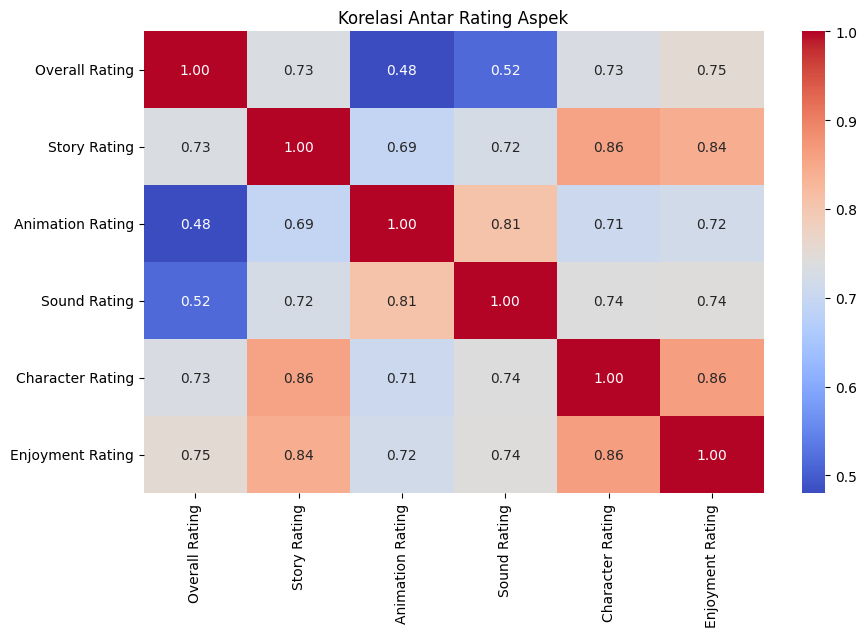

In [ ]:
rating_cols = ['Overall Rating', 'Story Rating', 'Animation Rating', 'Sound Rating', 'Character Rating', 'Enjoyment Rating']
correlation = df[rating_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Rating Aspek")
plt.show()

Matriks korelasi rating aspek menunjukkan hubungan antar kategori seperti Overall, Story, Animation, Sound, Character, dan Enjoyment. Nilai korelasi tertinggi (1.00) terlihat pada hubungan masing-masing kategori dengan dirinya sendiri, yang diharapkan. Korelasi tertinggi antar kategori berbeda ada antara Story dan Overall (0.73), Character dan Overall (0.73), serta Character dan Enjoyment (0.86), menunjukkan bahwa aspek cerita dan karakter memiliki pengaruh kuat terhadap rating keseluruhan dan kepuasan. Sebaliknya, korelasi terendah terlihat antara Animation dan Overall (0.48) serta Sound dan Overall (0.52), mengindikasikan bahwa animasi dan suara memiliki pengaruh lebih kecil terhadap rating keseluruhan. Secara umum, aspek Story, Character, dan Enjoyment saling berkorelasi cukup kuat (0.84-0.86), sementara Animation dan Sound cenderung memiliki korelasi lebih rendah dengan aspek lainnya (0.48-0.81).



## Jumlah Review Per Tahun

Untuk menganalisis tren atau pola jumlah ulasan yang diberikan oleh pengguna setiap tahunnya. Dengan mengetahui jumlah review yang diberikan per tahun, kita dapat melihat apakah ada peningkatan atau penurunan aktivitas pengguna dalam memberikan ulasan seiring waktu. Hal ini juga bisa memberikan insight tentang popularitas anime pada periode tertentu, serta memberikan gambaran tentang kecenderungan pengguna dalam memberikan feedback sepanjang waktu.

<ipython-input-11-f3a8e8660f00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Review Year', palette='crest')


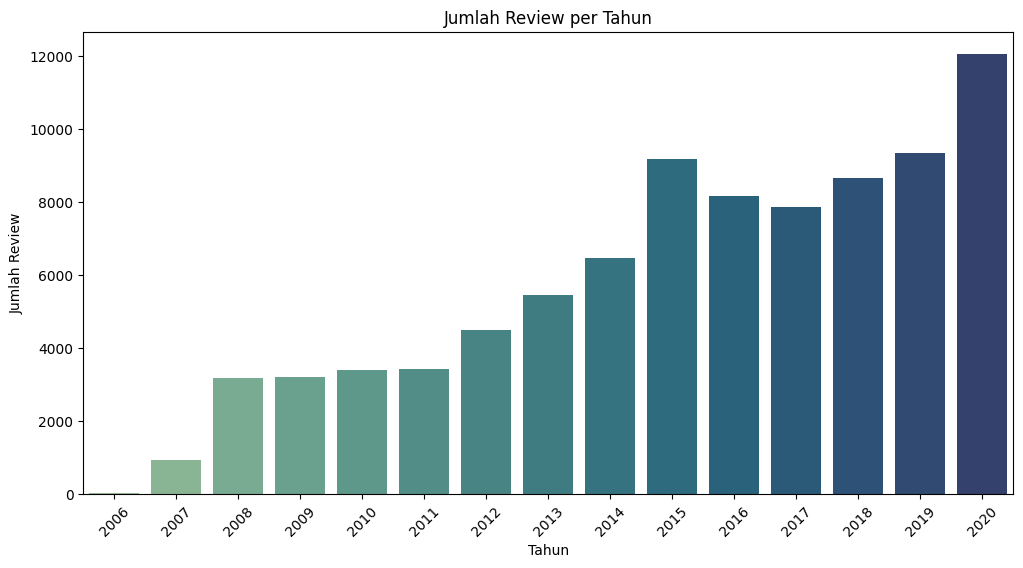

In [ ]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
df['Review Year'] = df['Review Date'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Review Year', palette='crest')
plt.title("Jumlah Review per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.show()


Pada visualisasai diatas review di mulai dari tahun 2007 dan review tertinggi atau terbanyak di berikan pada tahun 2020

### Data Preprocessing

Data di ambil dan membuat df_filtered dengan user yang memberikan rating > 0

In [ ]:
# Ambil hanya user yang memberikan rating
df_filtered = df[df['Overall Rating'] > 0]

Kolom yang di pilih dan yang akan digunakan Username, Anime Title, Overall Rating

In [ ]:
df_filtered = df_filtered[['Username', 'Anime Title', 'Overall Rating']]

Rename Kolom agar lebih mudah penggunaanya

In [ ]:
# Rename kolom dengan .rename() dan inplace=True
df_filtered = df_filtered.rename(columns={
    'Username': 'user_id',
    'Anime Title': 'anime_id',
    'Overall Rating': 'rating'
})

Normalisasi rating dengan rentang 0-1

In [ ]:
# Normalisasi rating
df_filtered['rating'] = df_filtered['rating'] / 10.0

Encode Username dan Anime Title ke bentuk angka

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
user_encoder = LabelEncoder()
anime_encoder = LabelEncoder()

# Encode user_id dan anime_id
df_filtered['user'] = user_encoder.fit_transform(df_filtered['user_id'])
df_filtered['anime'] = anime_encoder.fit_transform(df_filtered['anime_id'])

# Total user dan anime unik
total_users = df_filtered['user'].nunique()
total_animes = df_filtered['anime'].nunique()

# Lihat hasil encode
df_filtered.head()

,user_id,anime_id,rating,user,anime
0,tazillo,Fullmetal Alchemist: Brotherhood,1.0,33302,1047
1,Archaeon,Fullmetal Alchemist: Brotherhood,0.9,1838,1047
2,ChristopherKClaw,Fullmetal Alchemist: Brotherhood,0.7,3887,1047
3,literaturenerd,Fullmetal Alchemist: Brotherhood,0.7,28946,1047
4,M0nkeyD_Luffy,Fullmetal Alchemist: Brotherhood,0.5,11912,1047


#### Split Dataset

Split Dataset dengan Ratio 80:20

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x = df_filtered[['user', 'anime']].values
y = df_filtered['rating'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

num_users = df_filtered['user'].nunique()
num_anime = df_filtered['anime'].nunique()
embedding_size = 50


# Cek ukuran data
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)


Training data: (68762, 2)
Validation data: (17191, 2)


## Modelling

Membuat dan implementasi dari sebuah custom recommender system model menggunakan TensorFlow dan Keras, yang dirancang untuk merekomendasikan anime berdasarkan interaksi antara pengguna dan anime. Model ini menggunakan pendekatan collaborative filtering dengan memanfaatkan embedding layers untuk merepresentasikan pengguna (user_embedding) dan anime (anime_embedding) dalam bentuk vektor berdimensi rendah. Selain itu, ditambahkan juga bias untuk pengguna dan anime guna menangkap kecenderungan umum masing-masing. Pada saat pemanggilan (call method), model menghitung dot product antara vektor pengguna dan anime untuk mengukur kecocokan, kemudian menambahkan bias dan melewatkan hasilnya melalui fungsi aktivasi sigmoid untuk mendapatkan skor prediksi antara 0 dan 1. Regularisasi L2 dan initializer he_normal digunakan untuk meningkatkan generalisasi model.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Model class seperti sebelumnya
class AnimeRecommender(tf.keras.Model):
    def __init__(self, total_users, total_animes, embedding_size, **kwargs):
        super(AnimeRecommender, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=total_users,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(total_users, 1)

        self.anime_embedding = layers.Embedding(
            input_dim=total_animes,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.anime_bias = layers.Embedding(total_animes, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        anime_vector = self.anime_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        anime_bias = self.anime_bias(inputs[:, 1])

        dot_product = tf.reduce_sum(user_vector * anime_vector, axis=1, keepdims=True)
        x = dot_product + user_bias + anime_bias

        return tf.nn.sigmoid(x)

In [ ]:
# Inisialisasi model
model = AnimeRecommender(total_users, total_animes, embedding_size=50)

# Compile
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

 Model diinisialisasi dengan jumlah total pengguna, total anime, dan ukuran dimensi embedding (dalam hal ini 50). Setelah itu, model dikompilasi menggunakan fungsi loss Mean Squared Error (MSE) untuk mengukur seberapa jauh prediksi model dari nilai sebenarnya. Optimizer yang digunakan adalah Adam dengan learning rate sebesar 0.001, yang populer karena kemampuannya menyesuaikan learning rate secara adaptif selama pelatihan. Selain itu, dua metrik evaluasi ditambahkan yaitu Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) untuk memantau performa model dalam hal akurasi prediksi rating selama proses pelatihan.

In [ ]:
# Callback EarlyStopping
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=256,
    shuffle=True,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.1025 - mae: 0.2845 - rmse: 0.3199 - val_loss: 0.0968 - val_mae: 0.2763 - val_rmse: 0.3107
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 0.0933 - mae: 0.2703 - rmse: 0.3047 - val_loss: 0.0904 - val_mae: 0.2651 - val_rmse: 0.2990
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0798 - mae: 0.2458 - rmse: 0.2799 - val_loss: 0.0828 - val_mae: 0.2476 - val_rmse: 0.2824
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0611 - mae: 0.2056 - rmse: 0.2395 - val_loss: 0.0775 - val_mae: 0.2310 - val_rmse: 0.2677
Epoch 5/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0459 - mae: 0.1647 - rmse: 0.1981 - val_loss: 0.0755 - val_mae: 0.2203 - val_rmse: 0.2583
Epoch 6/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0367 - mae: 0.1338 - rmse: 0.1653 - val_loss: 0.0749 - val_mae: 0.2139 - val_rmse: 0.2526
Epoch 7/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0315 - mae: 0.

## Evaluasi dan Visualisasi

Bagian Evaluasi dan Visualisasi bertujuan untuk mengukur performa model rekomendasi setelah proses pelatihan selesai serta menampilkan hasil evaluasi tersebut dalam bentuk visual. Evaluasi biasanya dilakukan dengan menggunakan metrik seperti MAE (Mean Absolute Error) dan RMSE (Root Mean Squared Error) untuk melihat seberapa akurat prediksi model dibandingkan dengan nilai rating sebenarnya.

In [ ]:
# Evaluasi akhir pada validation set
val_loss, val_mae, val_rmse = model.evaluate(x_val, y_val, verbose=1)
print(f"\nValidation Loss (MSE): {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")


538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0476 - mae: 0.1571 - rmse: 0.2005

Validation Loss (MSE): 0.0466
Validation MAE: 0.1557
Validation RMSE: 0.1981


Hasil evaluasi menunjukkan bahwa model memiliki nilai Validation Loss (MSE) sebesar 0.0466, MAE sebesar 0.1557, dan RMSE sebesar 0.1981, yang mencerminkan performa prediksi model terhadap data validasi.

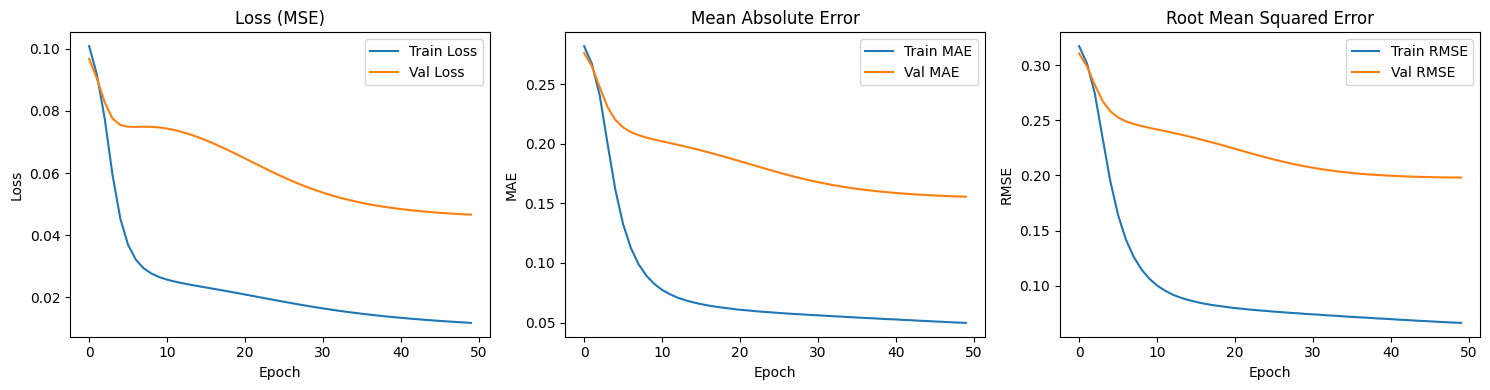

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot RMSE
plt.subplot(1, 3, 3)
plt.plot(history.history['rmse'], label='Train RMSE')
plt.plot(history.history['val_rmse'], label='Val RMSE')
plt.title('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


Berdasarkan grafik MSE, MAE, dan RMSE selama 50 epoch, model menunjukkan tren penurunan yang konsisten pada kedua metrik (train dan validasi), dengan nilai akhir mendekati nol. Penurunan MSE dari 0.10 ke 0, MAE dari 0.25 ke 0.05, dan RMSE dari 0.30 ke 0.10 mengindikasikan bahwa model semakin akurat dalam memprediksi data, baik pada data latih maupun validasi, tanpa tanda overfitting (karena val loss mengikuti tren train loss). Konsistensi penurunan tanpa fluktuasi besar menunjukkan proses pelatihan yang stabil dan efektif. Dengan demikian, model dapat disimpulkan memiliki kemampuan generalisasi yang baik, meskipun perlu dipastikan bahwa data validasi representatif dan tidak terjadi underfitting pada epoch akhir.

# Mendapatkan Rekomendasi

## Prediksi Rating dari Pasangan User-Anime

Selanjutnya adalah kita mencoba untuk mendapatkan Rekomendasi, hal pertama adalah saya mencari anime_id untuk Gintama°

In [ ]:
# Mengecek ID untuk anime "Gintama"
anime_name = "Gintama°"
anime_id = anime_encoder.transform([anime_name])
A
print(f"ID untuk anime '{anime_name}': {anime_id[0]}")

ID untuk anime 'Gintama°': 1196


Lalu untuk mengetahui Prediksi Rating untuk Satu Pasangan User–Anime
Misalnya  ingin tahu Gintama yang telahh kita dapatkan anime_id nya:

"Kalau user dengan ID 10 (setelah encoding) menonton anime dengan ID 1196, berapa rating yang kemungkinan akan dia berikan?"

In [ ]:
user_id = 10
anime_id = 1196 # ini anime "Gintama°"
prediction = model.predict(np.array([[user_id, anime_id]]))
print(f"Prediksi rating untuk User {user_id} pada Anime {anime_id}: {prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediksi rating untuk User 10 pada Anime 1196: 0.91


Dari hal tersebut model memprediksi rating di angka 0.91(ini merupakan nilai setelah normalisasi dari 0-1)

## Menemukan 10 anime terbaik yang direkomendasikan oleh model untuk 1 user tertentu.

Dengan kata lain, model memprediksi semua anime mana saja yang kemungkinan besar akan disukai oleh user tersebut, lalu mengambil 10 prediksi tertinggi.

In [ ]:
anime_ids = np.arange(total_animes)  # ID semua anime
user_data = np.array([[user_id, anime_id] for anime_id in anime_ids])

# Prediksi rating untuk setiap anime
predictions = model.predict(user_data)

# Mengambil 10 anime dengan rating tertinggi
top_10_animes = np.argsort(predictions[:, 0])[-10:][::-1]

# Menampilkan ID anime dan prediksi rating untuk 10 anime terbaik
recommended_animes = [(anime_encoder.inverse_transform([anime_id])[0], predictions[anime_id][0]) for anime_id in top_10_animes]

# Membuat DataFrame untuk hasil yang lebih rapi
recommended_df = pd.DataFrame(recommended_animes, columns=['Anime', 'Predicted Rating'])

# Menambahkan kolom No untuk ranking
recommended_df['No'] = np.arange(1, len(recommended_df) + 1)

# Menyusun ulang kolom sehingga 'No' berada di sebelah kiri
recommended_df = recommended_df[['No', 'Anime', 'Predicted Rating']]

# Menampilkan tabel hasil rekomendasi dengan user_id yang dinamis
print(f"10 Rekomendasi Anime Terbaik untuk User {user_id}:")
print(recommended_df.to_string(index=False))

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
10 Rekomendasi Anime Terbaik untuk User 10:
 No                                                 Anime  Predicted Rating
  1                                              Gintama°          0.910590
  2                               Sora yori mo Tooi Basho          0.889921
  3                    Shingeki no Kyojin Season 3 Part 2          0.881760
  4                         Suzumiya Haruhi no Shoushitsu          0.870965
  5 Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare          0.863196
  6                                         Uchuu Kyoudai          0.858214
  7                                        Hajime no Ippo          0.858153
  8                               Natsume Yuujinchou Roku          0.857721
  9                             Toaru Kagaku no Railgun T          0.857591
 10                                              Mononoke          0.850221


Model rekomendasi berhasil mengidentifikasi 10 anime terbaik yang diprediksi paling disukai oleh user dengan ID 10, berdasarkan rating yang telah dipelajari selama pelatihan. Model ini mengevaluasi seluruh daftar anime dan memberikan skor prediksi (rating) untuk masing-masing, lalu memilih 10 dengan nilai tertinggi. Rekomendasi tersebut mencerminkan preferensi pengguna secara personal, seperti terlihat dari munculnya judul-judul populer seperti Gintama°, Shingeki no Kyojin Season 3 Part 2, dan Mononoke, yang kemungkinan besar akan memberikan pengalaman menonton yang memuaskan bagi pengguna tersebut.

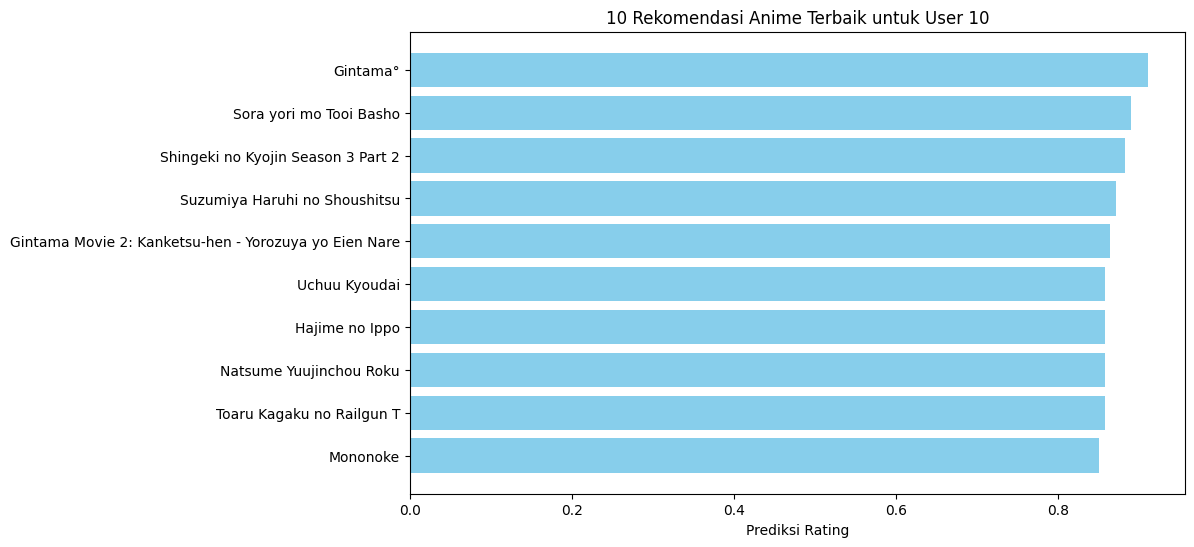

In [ ]:
# Plotting 10 rekomendasi anime
anime_titles = [anime[0] for anime in recommended_animes]
ratings = [anime[1] for anime in recommended_animes]

plt.figure(figsize=(10, 6))
plt.barh(anime_titles, ratings, color='skyblue')
plt.xlabel('Prediksi Rating')
plt.title('10 Rekomendasi Anime Terbaik untuk User 10')
plt.gca().invert_yaxis()
plt.show()


Berdasarkan hasil visualisasi rekomendasi, terlihat bahwa Gintama° menjadi anime dengan prediksi rating tertinggi untuk User 10, diikuti oleh Sora yori mo Tooi Basho dan Shingeki no Kyojin Season 3 Part 2, yang menunjukkan bahwa model cenderung merekomendasikan anime dengan popularitas dan kualitas tinggi sesuai preferensi user tersebut.

kesimpulan : Pada tahap evaluasi dan visualisasi, model rekomendasi menunjukkan performa yang sangat baik dengan nilai Validation Loss (MSE) sebesar 0.0466, MAE sebesar 0.1557, dan RMSE sebesar 0.1981, yang mengindikasikan tingkat akurasi prediksi yang tinggi. Grafik pelatihan memperlihatkan tren penurunan yang konsisten pada metrik MSE, MAE, dan RMSE baik pada data latih maupun validasi, tanpa adanya tanda overfitting, menunjukkan proses pelatihan yang stabil dan efektif. Model mampu memprediksi rating user terhadap anime secara akurat, seperti terlihat dari prediksi rating sebesar 0.91 untuk anime Gintama° oleh user ID 10. Selain itu, sistem berhasil menghasilkan 10 rekomendasi anime terbaik dengan prediksi rating tertinggi yang relevan dengan preferensi user tersebut, dan hasil ini diperkuat oleh visualisasi batang horizontal yang menampilkan judul-judul anime populer seperti Gintama°, Shingeki no Kyojin Season 3 Part 2, dan Mononoke, yang memperkuat validitas model dalam memberikan rekomendasi yang personal dan berkualitas.